In [1]:
import pandas as pd 
import numpy as np

Creating a function to clean and load the dataset 

In [2]:
def wrangle(filepath):
    
    #Reading the data set 
    df = pd.read_csv(filepath, compression = 'gzip')
    
    for column in df.columns:
        
        #Removing the irrelevant columns 
        if df[column].dtype == 'object':
            df.drop(columns = [column], inplace = True)
        else:
            #cleansing the data set for nan, infinity and large data type
            if np.any(np.isnan(df[column])) or np.any(np.isinf(df[column])) or np.any(np.abs(df[column]) > np.finfo(np.float64).max):

                #Replace it with median values of that columns
                median_value = np.median(df[column][np.isfinite(df[column])])
                df[column].replace([np.nan, np.inf, -np.inf], median_value, inplace = True)

    return df

In [3]:
df = wrangle('C:/Users/akwar/Downloads/data_assignment.gz')
print(df.shape)
df.head()

(181859, 72)


,is_exclusive_lead,ns_count_1day,ns_count_3day,ns_count_1week,ns_count_1month,ns_count_6month,responded_lead_1day,responded_lead_3day,responded_lead_1week,responded_lead_1month,...,days_no_block_in_6month,days_block_in_6month,number_times_blocked_in_6month,avg_order_value_1day,avg_order_value_3day,avg_order_value_1week,avg_order_value_1month,avg_order_value_3month,avg_order_value_6month,ns
0,0,0,0,0,1,5,2,6,13,32,...,178,2,1,0.0,157.833333,352.923077,479.406250,399.288660,363.672646,0
1,0,0,0,0,1,4,2,7,15,66,...,180,0,0,372.0,302.857143,382.400000,421.212121,384.906832,347.167742,0
2,0,0,0,1,1,1,3,5,10,35,...,180,0,0,249.0,149.400000,411.800000,339.971429,273.268041,225.731132,0
3,0,0,0,0,1,19,2,7,22,76,...,179,0,0,0.0,406.285714,255.181818,342.552632,422.446512,386.900000,0
4,0,0,0,0,0,1,2,7,20,89,...,180,0,0,114.5,162.428571,183.400000,186.033708,162.231034,169.665428,1


# Split

In [4]:
#Creating Feature matrix 
target = 'ns'
y = df[target]
X = df.drop(columns = target)

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (181859, 71)
Y shape: (181859,)


Diving the data set into training and testing 

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state = 42
)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (145487, 71)
y_train: (145487,)
X_test: (36372, 71)
y_test: (36372,)


Resampling the data with over sampling due to imbalance dataset 

In [6]:
from imblearn.over_sampling import RandomOverSampler

over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (282084, 71)


,is_exclusive_lead,ns_count_1day,ns_count_3day,ns_count_1week,ns_count_1month,ns_count_6month,responded_lead_1day,responded_lead_3day,responded_lead_1week,responded_lead_1month,...,number_times_blocked_in_3month,days_no_block_in_6month,days_block_in_6month,number_times_blocked_in_6month,avg_order_value_1day,avg_order_value_3day,avg_order_value_1week,avg_order_value_1month,avg_order_value_3month,avg_order_value_6month
0,1,1,1,1,2,6,5,13,21,53,...,0,151,0,0,1016.800000,651.538462,528.047619,591.622641,588.240437,620.026578
1,0,0,0,0,2,6,9,14,20,102,...,1,165,15,2,210.444444,190.785714,151.500000,160.107843,128.382927,116.710127
2,0,0,0,0,0,0,4,7,17,97,...,0,180,0,0,112.250000,202.142857,182.352941,208.824742,177.941176,174.418142
3,1,0,1,1,1,1,5,8,8,62,...,0,59,0,0,629.800000,618.000000,618.000000,726.870968,577.704403,577.704403
4,1,0,0,0,0,9,4,8,16,42,...,2,138,4,3,231.750000,260.375000,304.312500,387.595238,388.731092,359.558685


As we can see from the above that the size of the dataset has increased due to resampling

# Model Building

In [7]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9694


Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train_over, y_train_over)
print(f"Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.")

Decision tree has 14511 nodes with maximum depth 57.


In [9]:
#Probability Prediction 
train_probs = tree.predict_proba(X_train_over)[:, -1]
probs = tree.predict_proba(X_test)[:, -1]

train_predictions = tree.predict(X_train_over)
predictions = tree.predict(X_test)

In [10]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f" Train ROC AUC Score: {roc_auc_score(y_train_over, train_probs)}")
print(f"Test ROC AUC Score: {roc_auc_score(y_test, probs)}")

 Train ROC AUC Score: 0.973526790623741
Test ROC AUC Score: 0.541677085846625


In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix


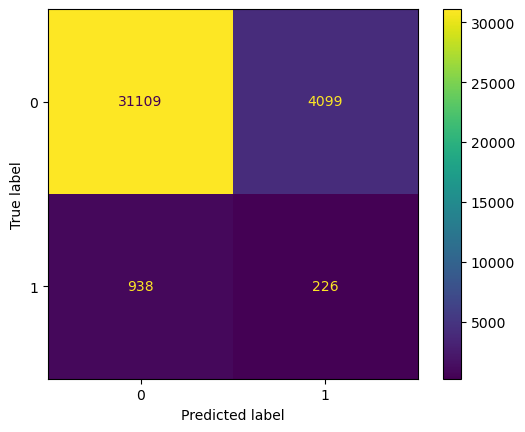

In [12]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test);

In [13]:
class_report = classification_report(y_test, tree.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.93     35208
           1       0.05      0.19      0.08      1164

    accuracy                           0.86     36372
   macro avg       0.51      0.54      0.50     36372
weighted avg       0.94      0.86      0.90     36372



Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    
    SimpleImputer(), RandomForestClassifier(random_state = 42)
)

Performing cross validation with classifier using over_sampled training data. 

In [15]:
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv = 5, n_jobs =1)
print(cv_scores)

[0.9424996  0.94322633 0.94239325 0.94427212 0.94279991]


In [16]:
#Creating a dictionary for range for hyper parameters. 
params = {
    "simpleimputer__strategy": ['mean', 'median'],
    "randomforestclassifier__n_estimators": range(25,100,25),
    "randomforestclassifier__max_depth": range(10,50,10)
}

Creating a GridSeachCV that includes classifier and hyperparameter grid.

In [17]:
model = GridSearchCV(
    clf, param_grid = params, cv =5, n_jobs =-1, verbose = 1
)

In [18]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [19]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,188.543082,2.053636,3.985480,0.647190,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.782796,0.787032,0.790400,0.785100,0.779938,0.785053,0.003571,23
1,207.480741,4.169109,3.353189,0.526870,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.782796,0.787032,0.790400,0.785100,0.779938,0.785053,0.003571,23
2,382.177184,11.524639,6.541989,0.393235,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.784852,0.788326,0.795700,0.793715,0.787454,0.790009,0.004051,21
3,406.040335,24.604498,6.270956,0.405076,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.784852,0.788326,0.795700,0.793715,0.787454,0.790009,0.004051,21
4,599.674848,16.841784,9.083896,0.588395,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.788025,0.794264,0.796958,0.794672,0.788553,0.792494,0.003558,19


In [20]:
#Extracting the best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'mean'}

In [21]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 0.8936
Model Test Accuracy: 0.8691


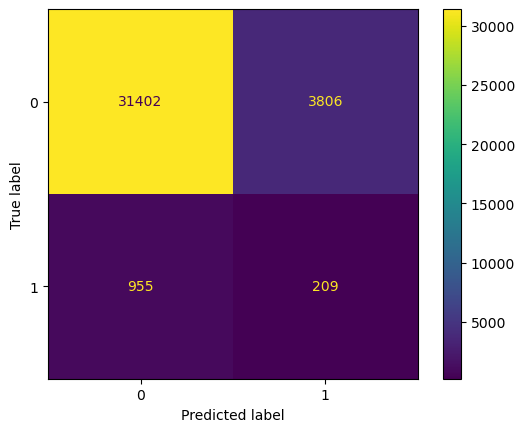

In [22]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [23]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     35208
           1       0.05      0.18      0.08      1164

    accuracy                           0.87     36372
   macro avg       0.51      0.54      0.51     36372
weighted avg       0.94      0.87      0.90     36372



In [24]:
#Get important features
features = X_train_over.columns 

#Extract importances from model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

#Create a series with feature names and importances 
feat_imp = pd.Series(importances, index=features).sort_values()

Text(0.5, 1.0, 'Feature Importance')

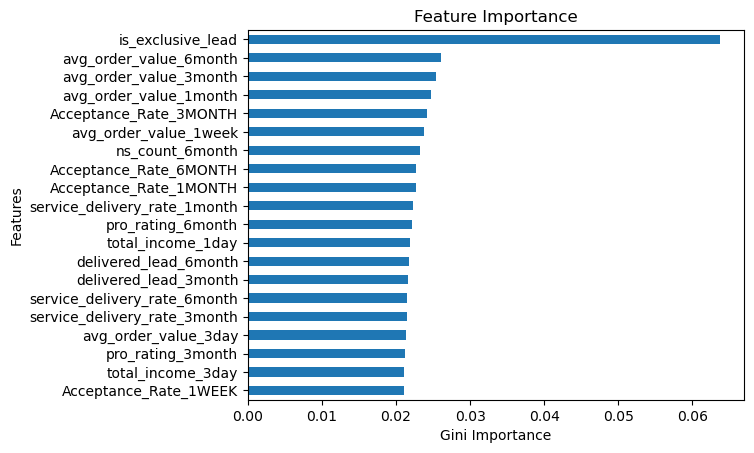

In [25]:
import matplotlib.pyplot as plt

#Plot the important features
feat_imp.tail(20).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Feature Importance")

In [26]:
import ipywidgets as widgets
from ipywidgets import interact

def make_cnf_matrix(threshold):
    
    y_pred_proba = model.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba >= threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar = False)

In [27]:
thresh_widget = widgets.FloatSlider(min = 0, max = 1, value = 0.2, step = 0.2)
interact(make_cnf_matrix, threshold = thresh_widget);

interactive(children=(FloatSlider(value=0.2, description='threshold', max=1.0, step=0.2), Output()), _dom_clas…

In [28]:
#Calculating for best threshold value 
best_threshold = None 
max_expected_value = float('-inf')

for threshold in np.linspace(0, 1, 100): # Using 100 thresholds between 0 and 1
    
    y_pred_proba = model.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba >= threshold
    
    #Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    
    #Define benefit and cost values
    B_TP = 400
    B_TN = 0
    C_FP = -200
    C_FN = -150
    
    #Define the benefit and cost values
    EV = TP* B_TP + TN * B_TN + FP * C_FP + FN * C_FN
    
    #Check if this threshold gives a higher expected values
    if EV > max_expected_value:
        max_expected_value = EV 
        best_threshold = threshold
        
print("Best Threshold:", best_threshold)
print("Max Expected Value:", max_expected_value)

Best Threshold: 1.0
Max Expected Value: -182850
